# **Recurrent Neural Networks (RNNs)**

*Based on Chapter X of "Speech and Language Processing" by Jurafsky & Martin*  

## **1. Introduction to Recurrent Neural Networks (RNNs)**

Recurrent Neural Networks (RNNs) are a class of neural networks designed to recognize patterns in sequences of data, such as time series, natural language, or video frames. Unlike traditional feedforward neural networks, RNNs have connections that form directed cycles, allowing them to maintain a hidden state that captures information from previous inputs in the sequence.

---

## **2. Understanding RNNs**

### **Basic RNN Architecture**

An RNN processes sequences by iterating through the input tokens and maintaining a hidden state that captures information about previous tokens. The basic architecture can be visualized as follows:

![Basic RNN Architecture](https://upload.wikimedia.org/wikipedia/commons/b/b5/Recurrent_neural_network_unfold.svg)

*Figure: Basic RNN Architecture*

**Mathematical Formulation:**

At each time step \( t \), the RNN updates its hidden state \( h_t \) and produces an output \( o_t \):

$$
h_t = \tanh(W_{ih}x_t + W_{hh}h_{t-1} + b_h)
$$

$$
o_t = W_{ho}h_t + b_o
$$

Where:
- \( x_t \) is the input at time \( t \).
- \( h_{t-1} \) is the hidden state from the previous time step.
- \( W_{ih} \), \( W_{hh} \), and \( W_{ho} \) are weight matrices.
- \( b_h \) and \( b_o \) are bias vectors.
- \( \tanh \) is the activation function.

### **Applications of RNNs**

RNNs are widely used in various applications, including:

- **Natural Language Processing (NLP):** Language modeling, machine translation, sentiment analysis.
- **Speech Recognition:** Transcribing spoken language into text.
- **Time Series Prediction:** Forecasting stock prices, weather conditions.
- **Music Generation:** Composing melodies and harmonies.

---

## **3. Challenges in Training RNNs**

While RNNs are powerful for sequence modeling, they face significant challenges during training, primarily due to gradient-related issues.

### **Vanishing Gradients**

**Problem:**
During backpropagation through time (BPTT), gradients can become extremely small, effectively preventing the network from learning long-range dependencies in the data.

**Impact:**
- Difficulty in capturing dependencies that are far apart in the sequence.
- Slow convergence or failure to train effectively.

**Visualization:**

![Vanishing Gradients](https://miro.medium.com/v2/resize:fit:716/1*-rPcuafUSo-SwZF121y_rQ.png)

*Figure: Illustration of Vanishing Gradients*

### **Exploding Gradients**

**Problem:**
Gradients can also become excessively large during training, leading to numerical instability.

**Impact:**
- Parameters can grow exponentially, causing the model to diverge.
- Training becomes unstable and may fail to converge.

**Visualization:**

![Exploding Gradients](https://miro.medium.com/v2/resize:fit:700/1*AOwXWfBegd-qlr2RV_YmDg.png)

*Figure: Illustration of Exploding Gradients*

---

## **4. Advanced RNN Architectures**

To address the challenges of vanishing and exploding gradients, more sophisticated RNN architectures have been developed.

### **Long Short-Term Memory (LSTM)**

**Overview:**
Introduced by Hochreiter and Schmidhuber in 1997, LSTM networks are a type of RNN capable of learning long-term dependencies. They mitigate the vanishing gradient problem through a more complex architecture that includes memory cells and gating mechanisms.

**Key Components:**
- **Cell State (\( C_t \)):** Carries information across time steps with minimal modification.
- **Gates:** Control the flow of information.
    - **Forget Gate (\( f_t \))**: Decides what information to discard from the cell state.
    - **Input Gate (\( i_t \))**: Decides which new information to add to the cell state.
    - **Output Gate (\( o_t \))**: Decides what information to output based on the cell state.

**Mathematical Formulation:**

$$
f_t = \sigma(W_f \cdot [h_{t-1}, x_t] + b_f)
$$

$$
i_t = \sigma(W_i \cdot [h_{t-1}, x_t] + b_i)
$$

$$
\tilde{C}_t = \tanh(W_C \cdot [h_{t-1}, x_t] + b_C)
$$

$$
C_t = f_t * C_{t-1} + i_t * \tilde{C}_t
$$

$$
o_t = \sigma(W_o \cdot [h_{t-1}, x_t] + b_o)
$$

$$
h_t = o_t * \tanh(C_t)
$$

### **Gated Recurrent Unit (GRU)**

**Overview:**
Proposed by Cho et al. in 2014, GRUs are a simpler variant of LSTMs that also aim to solve the vanishing gradient problem. They combine the forget and input gates into a single update gate and merge the cell state and hidden state.

**Key Components:**
- **Update Gate (\( z_t \))**: Determines how much of the past information needs to be passed along to the future.
- **Reset Gate (\( r_t \))**: Determines how to combine the new input with the previous memory.

**Mathematical Formulation:**

$$
z_t = \sigma(W_z \cdot [h_{t-1}, x_t] + b_z)
$$

$$
r_t = \sigma(W_r \cdot [h_{t-1}, x_t] + b_r)
$$

$$
\tilde{h}_t = \tanh(W \cdot [r_t * h_{t-1}, x_t] + b)
$$

$$
h_t = (1 - z_t) * h_{t-1} + z_t * \tilde{h}_t
$$

**Advantages:**
- Fewer parameters than LSTM.
- Faster to train while maintaining similar performance.

---

## **5. Practical Implementation with PyTorch**

In this section, we'll implement RNNs, LSTMs, and GRUs using **PyTorch**, demonstrate how to handle vanishing and exploding gradients, and visualize the effects.

### **Building a Simple RNN**

We'll start by building a simple RNN from scratch to understand its workings.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

#### **RNN Cell Implementation**

In [2]:
class SimpleRNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size
        
        # Define layers
        self.i2h = nn.Linear(input_size + hidden_size, hidden_size)
        self.i2o = nn.Linear(input_size + hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, input, hidden):
        combined = torch.cat((input, hidden), 1)  # Concatenate input and hidden state
        hidden = torch.tanh(self.i2h(combined))
        output = self.softmax(self.i2o(combined))
        return output, hidden
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)


#### **Dataset Preparation**

For demonstration, we'll create a toy dataset for a simple classification task.


In [3]:
# Toy dataset: binary classification based on sum of input vector
np.random.seed(0)
torch.manual_seed(0)

# Generate random data
data_size = 1000
input_size = 10
hidden_size = 20
output_size = 2  # Binary classification

# Inputs
X = np.random.randn(data_size, input_size)

# Labels: if sum > 0, class 1 else class 0
y = (X.sum(axis=1) > 0).astype(int)
y = torch.tensor(y, dtype=torch.long).view(-1, 1)


#### **Training the Simple RNN**


In [4]:
# Instantiate the model, define loss and optimizer
model = SimpleRNN(input_size, hidden_size, output_size)
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.005)

# Training loop
num_epochs = 100
loss_history = []

for epoch in range(num_epochs):
    total_loss = 0
    for i in range(data_size):
        input_tensor = torch.tensor(X[i], dtype=torch.float).view(1, -1)
        target = y[i]
        
        hidden = model.initHidden()
        
        model.zero_grad()
        
        output, hidden = model(input_tensor, hidden)
        loss = criterion(output, target)
        loss.backward()
        
        optimizer.step()
        
        total_loss += loss.item()
    
    average_loss = total_loss / data_size
    loss_history.append(average_loss)
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}')

Epoch 10/100, Loss: 0.1195
Epoch 20/100, Loss: 0.0909
Epoch 30/100, Loss: 0.0777
Epoch 40/100, Loss: 0.0697
Epoch 50/100, Loss: 0.0641
Epoch 60/100, Loss: 0.0598
Epoch 70/100, Loss: 0.0565
Epoch 80/100, Loss: 0.0537
Epoch 90/100, Loss: 0.0514
Epoch 100/100, Loss: 0.0495


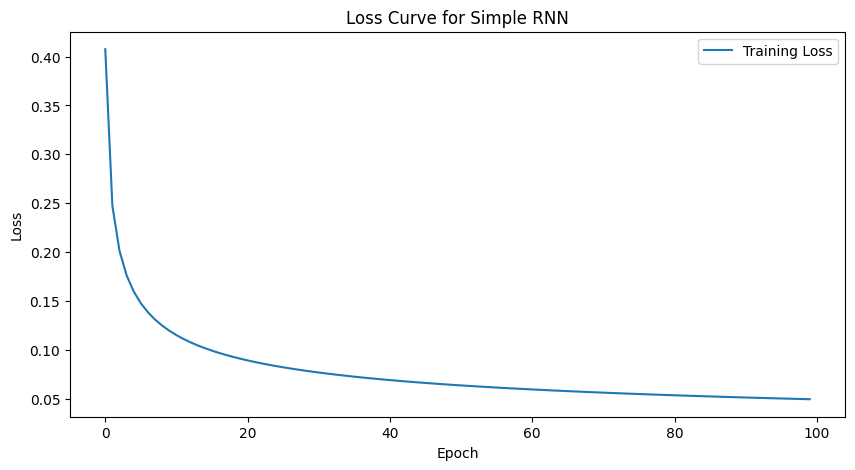

In [5]:
plt.figure(figsize=(10,5))
plt.plot(loss_history, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve for Simple RNN')
plt.legend()
plt.show()

### **Implementing LSTM and GRU**

PyTorch provides built-in modules for LSTM and GRU, simplifying their implementation.

#### **LSTM Implementation**

In [6]:
class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTMClassifier, self).__init__()
        self.hidden_size = hidden_size
        
        # Define LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        
        # Define output layer
        self.fc = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, x):
        # Initialize hidden and cell states
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        c0 = torch.zeros(1, x.size(0), self.hidden_size)
        
        # Forward propagate LSTM
        out, _ = self.lstm(x, (h0, c0))  # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        # Decode the last time step
        out = self.fc(out[:, -1, :])
        out = self.softmax(out)
        return out

#### **GRU Implementation**

In [11]:
class GRUClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(GRUClassifier, self).__init__()
        self.hidden_size = hidden_size
        
        # Define GRU layer
        self.gru = nn.GRU(input_size, hidden_size, batch_first=True)
        
        # Define output layer
        self.fc = nn.Linear(hidden_size, output_size)
        self.softmax = nn.LogSoftmax(dim=1)
    
    def forward(self, x):
        # Initialize hidden state
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        
        # Forward propagate GRU
        out, _ = self.gru(x, h0)  # out: tensor of shape (batch_size, seq_length, hidden_size)
        
        # Decode the last time step
        out = self.fc(out[:, -1, :])
        out = self.softmax(out)
        return out

#### **Preparing Data for LSTM and GRU**

In [8]:
# Reshape data for LSTM and GRU
# LSTM expects input of shape (batch_size, seq_length, input_size)
# We'll treat each input vector as a sequence of length 1
X_lstm = torch.tensor(X, dtype=torch.float).view(data_size, 1, input_size)
y_lstm = y.squeeze()

# Create TensorDataset and DataLoader
from torch.utils.data import TensorDataset, DataLoader

dataset = TensorDataset(X_lstm, y_lstm)
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

#### **Training the LSTM Classifier**

In [9]:
# Instantiate the model, define loss and optimizer
hidden_size = 50
model_lstm = LSTMClassifier(input_size, hidden_size, output_size)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model_lstm.parameters(), lr=0.001)

# Training loop
num_epochs = 20
loss_history_lstm = []

for epoch in range(num_epochs):
    total_loss = 0
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model_lstm(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    average_loss = total_loss / len(dataloader)
    loss_history_lstm.append(average_loss)
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}')

Epoch 5/20, Loss: 0.2654
Epoch 10/20, Loss: 0.1032
Epoch 15/20, Loss: 0.0644
Epoch 20/20, Loss: 0.0479


#### **Training the GRU Classifier**

In [12]:
# Instantiate the model, define loss and optimizer
model_gru = GRUClassifier(input_size, hidden_size, output_size)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model_gru.parameters(), lr=0.001)

# Training loop
num_epochs = 20
loss_history_gru = []

for epoch in range(num_epochs):
    total_loss = 0
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model_gru(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    
    average_loss = total_loss / len(dataloader)
    loss_history_gru.append(average_loss)
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}')

Epoch 5/20, Loss: 0.2030
Epoch 10/20, Loss: 0.0931
Epoch 15/20, Loss: 0.0658
Epoch 20/20, Loss: 0.0490


#### **Plotting the Loss Curves**

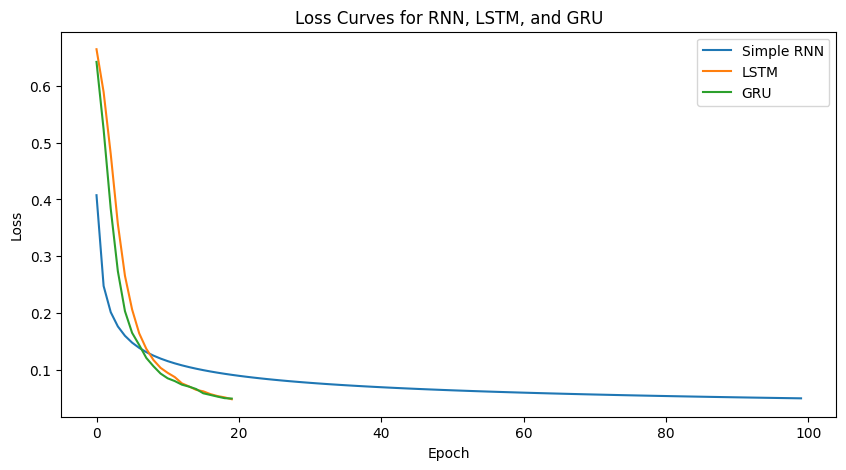

In [13]:
plt.figure(figsize=(10,5))
plt.plot(loss_history, label='Simple RNN')
plt.plot(loss_history_lstm, label='LSTM')
plt.plot(loss_history_gru, label='GRU')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curves for RNN, LSTM, and GRU')
plt.legend()
plt.show()

### **Handling Vanishing and Exploding Gradients**

PyTorch provides utilities to manage exploding gradients, primarily through gradient clipping.

#### **Gradient Clipping**

Gradient clipping prevents the gradients from becoming too large, addressing the exploding gradient problem.


In [14]:
# Example of gradient clipping in training loop

# Define a new training loop with gradient clipping for the GRU model
model_gru = GRUClassifier(input_size, hidden_size, output_size)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model_gru.parameters(), lr=0.001)

num_epochs = 20
loss_history_gru_clip = []

for epoch in range(num_epochs):
    total_loss = 0
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model_gru(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        
        # Gradient clipping
        torch.nn.utils.clip_grad_norm_(model_gru.parameters(), max_norm=1.0)
        
        optimizer.step()
        total_loss += loss.item()
    
    average_loss = total_loss / len(dataloader)
    loss_history_gru_clip.append(average_loss)
    
    if (epoch+1) % 5 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {average_loss:.4f}')

Epoch 5/20, Loss: 0.2103
Epoch 10/20, Loss: 0.0953
Epoch 15/20, Loss: 0.0628
Epoch 20/20, Loss: 0.0487



#### **Visualization of Gradients**

To visualize the effect of vanishing and exploding gradients, we can monitor the norm of gradients during training.


In [18]:
# Function to monitor gradient norms
def monitor_gradients(model, dataloader):
    grad_norms = []
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        grad_norm = 0
        for param in model.parameters():
            if param.grad is not None:
                grad_norm += param.grad.norm().item()
        grad_norms.append(grad_norm)
    return grad_norms

# Monitor gradients before and after clipping
model_gru = GRUClassifier(input_size, hidden_size, output_size)
criterion = nn.NLLLoss()
optimizer = optim.Adam(model_gru.parameters(), lr=0.001)

# Before clipping
grad_norms_before = monitor_gradients(model_gru, dataloader)

# Apply gradient clipping and monitor
grad_norms_after = []
for epoch in range(1):
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        outputs = model_gru(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        
        # Without clipping
        grad_norm = 0
        for param in model_gru.parameters():
            if param.grad is not None:
                grad_norm += param.grad.norm().item()
        grad_norms_after.append(grad_norm)
        
        # With clipping
        torch.nn.utils.clip_grad_norm_(model_gru.parameters(), max_norm=1.0)
        loss.backward()
        grad_norm_clipped = 0
        for param in model_gru.parameters():
            if param.grad is not None:
                grad_norm_clipped += param.grad.norm().item()
        grad_norms_after.append(grad_norm_clipped)

# Plotting gradient norms
plt.figure(figsize=(10,5))
plt.plot(grad_norms_before, label='Before Clipping')
plt.plot(grad_norms_after, label='After Clipping')
plt.xlabel('Batch')
plt.ylabel('Gradient Norm')
plt.title('Gradient Norms Before and After Clipping')
plt.legend()
plt.show()

RuntimeError: 0D or 1D target tensor expected, multi-target not supported


## **6. Conclusion**

In this notebook, we've delved into the fundamentals of **Recurrent Neural Networks (RNNs)**, explored the challenges of **vanishing and exploding gradients**, and examined advanced architectures like **LSTM** and **GRU**. Through practical implementations using **PyTorch**, we've seen how these models can be built, trained, and optimized for sequence modeling tasks.

**Key Takeaways:**

1. **RNNs** are powerful for modeling sequential data but suffer from gradient-related challenges.
2. **Vanishing Gradients** hinder learning long-term dependencies, while **Exploding Gradients** can destabilize training.
3. **LSTM** and **GRU** architectures effectively address these challenges through gating mechanisms.
4. **PyTorch** provides robust tools and modules to implement and train these models efficiently.
5. **Gradient Clipping** is a practical technique to prevent exploding gradients and stabilize training.

---

## **7. References**

- [Jurafsky & Martin - Speech and Language Processing](https://web.stanford.edu/~jurafsky/slp3/)
- [Elman, J. L. (1990). Finding structure in time](https://doi.org/10.1515/9781400833599-002)
- [Hochreiter, S., & Schmidhuber, J. (1997). Long Short-Term Memory](https://www.bioinf.jku.at/publications/older/2604.pdf)
- [Cho, K., et al. (2014). Learning Phrase Representations using RNN Encoder-Decoder for Statistical Machine Translation](https://arxiv.org/abs/1406.1078)
- [PyTorch Documentation](https://pytorch.org/docs/stable/index.html)
- [Understanding the difficulty of training deep feedforward neural networks](https://proceedings.neurips.cc/paper/2010/file/0c1d2ce14a0c5fb6c1246f5c6d2f3d1f-Paper.pdf)
- [Exploding Gradients in RNNs](https://towardsdatascience.com/exploding-gradients-in-neural-networks-89f76620a9fc)
- [Vanishing Gradients in Neural Networks](https://towardsdatascience.com/vanishing-gradients-in-neural-networks-8f04f34c3a5d)

---

**Happy Learning!**

---